## Understang KMedoids
Doc : http://eric.univ-lyon2.fr/~ricco/cours/slides/classif_k_medoides.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

# 2D Points Dataset
x = np.array([1,0,2.5,6,1,8,3,0,3,9,8,4,5,6.5])
y = np.array([1,4,7,2,3,4,7,2,6,1,3,6,7,5])

n = x.shape[0] #Nb of points
k = 3 # Nb of clusters    k<n

points = np.array([x,y])
points = points.T # n 2D points  


medoids = points[np.random.randint(low=0,high=n,size=k)]   #Get random points 

l = points.shape[1] #Len of vector : 2 (Point)

In [2]:
medoids

array([[6.5, 5. ],
       [0. , 4. ],
       [1. , 1. ]])

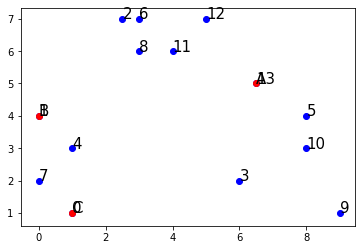

In [3]:
plt.scatter(points[:,0],points[:,1],color='blue')
plt.scatter(medoids[:,0],medoids[:,1],color='red')
for i in range(0,n): 
    plt.text(points[i][0], points[i][1], str(i), fontsize=15)
for i in range(0,k): 
    plt.text(medoids[i,0],medoids[i,1],chr(i+65), fontsize=15)

## Euclidean distance calculation


#### Inputs : 

<img src="img/Understanding_KMeans/Input.png" width=150  />

To compute the distance between each point and each middles we need to broadcast the two array 
<img src="img/Understanding_KMeans/step1.1.png" width=450  />
So now we can calculate substract each point by each middle and then pass the result to the the norm function
<img src="img/Understanding_KMeans/norm.PNG" width=300  />

<img src="img/Understanding_KMeans/step2.png" width=300  />
Then for each point we can choose the min distance

Our result will be :  [1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2]

In [4]:
def euclid_distances(points,medoids):
    
    k = medoids.shape[0]
    n = points.shape[0]
    l = points.shape[1]

    points=np.broadcast_to(points,(k,n,l)) 
    # (k,n,2)
    
    c = np.zeros((k,n,l))
    for i in range(0,k):         #Need to find a numpy way to do this to avoid loops
        c[i]=np.broadcast_to(medoids[i],(n,l))
    # (k,n,2)
    
    d = np.linalg.norm(points-c,axis=2) # Euclidean Distance
    # (k,n) because distance is a scalar here
 
    args=np.argmin(d,axis=0) #For each point get the argument of the minimum distance
    
    return(args)


In [9]:
def calc_new_medoids(points,belongs):
    #Choose new medoid for each class
    
    k = len(np.unique(belongs))
    l = points.shape[1]
    
    new_medoids = np.zeros((k,l))
    
    for i in range(k):
        current_class_points = points[belongs == i]
        
        a,b = current_class_points.shape
        
        q = np.broadcast_to(current_class_points,(a,a,b))
        
        c = np.zeros((a,a,b))
        for j in range(0,a):         #Need to find a numpy way to do this to avoid loops
            c[j] = np.broadcast_to(current_class_points[j],(a,b))

        v = np.linalg.norm(q-c,axis=2)
        s = np.sum(v,axis=1)
        ind = np.argmin(s)
        new_medoids[i] = current_class_points[ind]
        
    return(new_medoids)

In [6]:
def scatter_plot(points,middles,belongs):
    plt.scatter(points[:,0],points[:,1],color='blue')
    plt.scatter(middles[:,0],middles[:,1],color='red')
    
    for i in range(0,n): 
        plt.text(points[i][0], points[i][1], chr(belongs[i]+65), fontsize=15)
    for i in range(0,k): 
        plt.text(middles[i,0],middles[i,1], chr(i+65), fontsize=15)

### Running the Algorithm

In [10]:
for p in range(5):
    belongs = euclid_distances(points,medoids)
    medoids = calc_new_medoids(points,belongs)

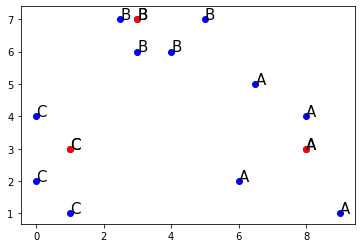

In [11]:
scatter_plot(points,medoids,belongs)